In [31]:
import numpy as np
from scipy import stats

In [2]:
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = 30

In [3]:
y = LogPlanetMass

In [12]:
intercept = np.ones(N)
X = np.column_stack([
intercept,
LogPlanetRadius, 
LogPlanetOrbit, 
StarMetallicity, 
LogStarMass, 
LogStarAge])

In [13]:
X.shape

(30, 6)

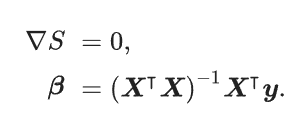

In [14]:
beta = np.linalg.inv((X.T @ X)) @ X.T @ y

In [17]:
beta.round(3)

array([ 0.154,  1.402, -0.141, -1.6  , -0.956, -0.462])

#### t_test calc

In [49]:
p = X.shape[1]

In [57]:
cov = np.sqrt(np.linalg.inv(X.T @ X).diagonal())

In [58]:
variance = np.linalg.norm(y-(X@beta))**2/(N-p)
std = variance**0.5

In [59]:
T_statistic = beta/(std*cov)

In [66]:
stats.t.sf(np.abs(T_statistic[0]), N-p)*2

0.9127570057958605

In [60]:
T_statistic

array([ 0.11072266,  4.89460135, -0.39188875, -1.27904669, -0.85601298,
       -1.24278459])

In [73]:
for t in T_statistic:
    print(f'p-value: {stats.t.sf(np.abs(t), df=N-p)*2:.5f}')

p-value: 0.91276
p-value: 0.00005
p-value: 0.69860
p-value: 0.21311
p-value: 0.40046
p-value: 0.22595
